In [4]:
!pip install -U retinaface_pytorch > /dev/null
!pip install -U torchvision > /dev/null

In [5]:
import cv2
import os
from matplotlib import pyplot as plt

In [7]:
from retinaface.pre_trained_models import get_model
from retinaface.utils import vis_annotations

In [8]:
plt.rcParams["figure.figsize"] = (15, 15)

In [9]:
model = get_model("resnet50_2020-07-20", max_size=2048)

/opt/conda/lib/python3.7/site-packages/torch/hub.py:513: UserWarning: Falling back to the old format < 1.6. This support will be deprecated in favor of default zipfile format introduced in 1.6. Please redo torch.save() to save it in the new zipfile format.
  warnings.warn('Falling back to the old format < 1.6. This support will be '


In [10]:
model.eval()

In [12]:
testSet = '/home/jovyan/riqdataset/aia-data2020/CNN_who_is_she/testing_set/'
imgName = '36063E5BF3.png'

In [8]:
imgFullPath = testSet+imgName
image = cv2.imread(imgFullPath)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# annotation = model.predict_jsons(image)
# print(f'annotation {annotation}')
# plt.imshow(vis_annotations(image, annotation))

In [9]:
image.shape[0]

640

In [10]:

dstDirName = testSet.replace('testing_set','testing_set_retina_pick1')
# dstDirName = dstDirName + imgName.replace('.png','/')
# if not os.path.exists(dstDirName):
#     os.makedirs(dstDirName)


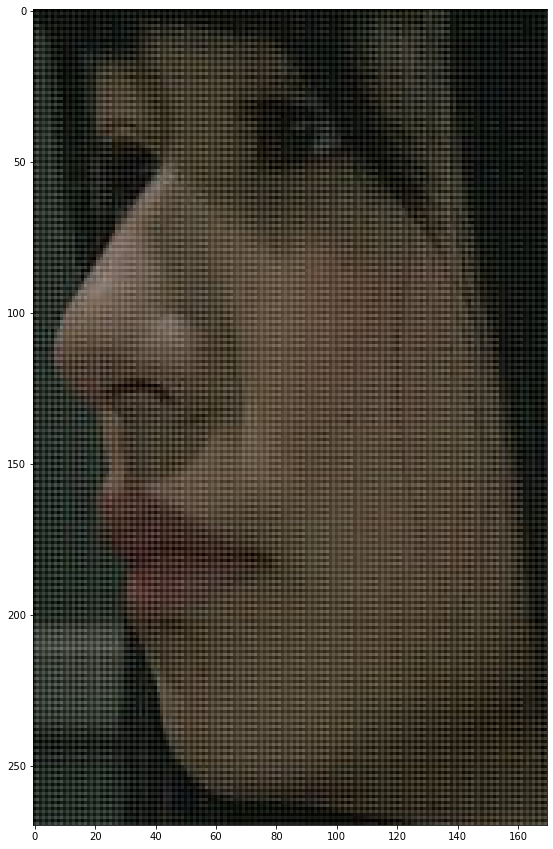

In [11]:
# if len(annotation) > 1:
#     for i in range(len(annotation)):
#         x1,y1,x2,y2 = annotation[i]['bbox']
#         x1 = max(0,x1);
#         y1 = max(0,y1);
#         x2 = min(image.shape[0],x2);
#         y2 = min(image.shape[0],y2);

cropped_image = image[150:420,230:400]
plt.imshow(cropped_image)
        
dstName = dstDirName + imgName
# print(dstName)
plt.savefig(dstName)

In [12]:
def pick1(face_list):
    a = 0.6
    b = 0.4
    score = []
    for x1,y1,x2,y2,w,cx in face_list:
        score.append(a * w + b * cx)
    
    max_score = 0
    max_id = 65536
    for i in range(len(score)):
        if score[i] > max_score:
            max_score = score[i]
            max_id = i
    return face_list[max_id][:4]


In [ ]:

for dirPath, dirNames, fileNames in os.walk(testSet):
    fileNames.sort()
    for imgName in fileNames: 
        dstName = testSet.replace('testing_set','testing_set_retina_pick1') + imgName
        print(dstName)
        if not os.path.exists(dstName):
            imgFullPath = testSet+imgName

            image = cv2.imread(imgFullPath)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            annotation = model.predict_jsons(image)
            img_h = image.shape[0]
            img_w = image.shape[1]

            face_pick1 = []
            print(imgName, f" has {len(annotation)} face {annotation[0]['bbox']} {image.shape}" )
            if annotation[0]['bbox']:
                for i in range(len(annotation)):
                    x1,y1,x2,y2 = annotation[i]['bbox']
                    w = x2-x1
                    cx = abs(img_w - (x1 + w/2))
                    face_pick1.append([x1,y1,x2,y2,w,cx])

                x1,y1,x2,y2 = pick1(face_pick1)

                x1 = max(0,x1);
                y1 = max(0,y1);
                x2 = min(img_w,x2);
                y2 = min(img_h,y2);
                print(x1,y1,x2,y2)
                cropped_image = image[y1:y2,x1:x2]
                plt.imshow(cropped_image)

                print(dstName)
                plt.savefig(dstName)

/home/jovyan/riqdataset/aia-data2020/CNN_who_is_she/testing_set_retina_pick1/006F8606F6.png
/home/jovyan/riqdataset/aia-data2020/CNN_who_is_she/testing_set_retina_pick1/00C22FC0EA.png
/home/jovyan/riqdataset/aia-data2020/CNN_who_is_she/testing_set_retina_pick1/00CECD2708.png
/home/jovyan/riqdataset/aia-data2020/CNN_who_is_she/testing_set_retina_pick1/0125D1C6C3.png
/home/jovyan/riqdataset/aia-data2020/CNN_who_is_she/testing_set_retina_pick1/0158CDF991.png
/home/jovyan/riqdataset/aia-data2020/CNN_who_is_she/testing_set_retina_pick1/01693B60FE.png
/home/jovyan/riqdataset/aia-data2020/CNN_who_is_she/testing_set_retina_pick1/019AE1E661.png
/home/jovyan/riqdataset/aia-data2020/CNN_who_is_she/testing_set_retina_pick1/01F03AFBFF.png
/home/jovyan/riqdataset/aia-data2020/CNN_who_is_she/testing_set_retina_pick1/025D0E8105.png
/home/jovyan/riqdataset/aia-data2020/CNN_who_is_she/testing_set_retina_pick1/030D460C87.png
/home/jovyan/riqdataset/aia-data2020/CNN_who_is_she/testing_set_retina_pick1/033

In [ ]:
print("DONE")

In [23]:
for dirPath, dirNames, fileNames in os.walk(testSet):
    fileNames.sort()
    print(dirPath,len(fileNames))
    dirPath = dirPath.replace('testing_set','testing_set_retina_pick1')
    for fileName in fileNames:
        dstName = dirPath + fileName
        if not os.path.exists(dstName):
            print(dstName)

for dirPath, dirNames, fileNames in os.walk(testSet.replace('testing_set','testing_set_retina_pick1')):
    fileNames.sort()
    print(dirPath,len(fileNames))

/home/jovyan/riqdataset/aia-data2020/CNN_who_is_she/testing_set/ 438
/home/jovyan/riqdataset/aia-data2020/CNN_who_is_she/testing_set_retina_pick1/ 438


In [133]:
print('DONE')

DONE


In [18]:
# testRetina = '/home/jovyan/riqdataset/aia-data2020/CNN_who_is_she/testing_set_retina/'
# for dirPath, dirNames, fileNames in os.walk(testRetina):
#     dirNames.sort()
#     for imgName in fileNames:        
        
#         dstDirName = dirPath.replace('retina','retina_160')
        
#         if not os.path.exists(dstDirName):
#             os.makedirs(dstDirName)
            
#             imgFullPath = dirPath+'/'+imgName
#             print(imgFullPath)
#             image = cv2.imread(imgFullPath)
#             image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#             img_resize = cv2.resize(image,(160,160))
#             plt.imshow(image)

#             dstName = imgFullPath.replace('retina','retina_160')
#             plt.savefig(dstName)

In [ ]:
# testRetina = '/home/jovyan/riqdataset/aia-data2020/CNN_who_is_she/testing_set_retina/'
# for dirPath, dirNames, fileNames in os.walk(testRetina):
#     dirNames.sort()
#     for imgName in fileNames:        
        
#         dstDirName = dirPath.replace('retina','retina_160_only1')
        
# #         if not os.path.exists(dstDirName):
# #             os.makedirs(dstDirName)
            
# #         imgFullPath = dirPath+'/'+imgName
# #         print(imgFullPath)
# #         image = cv2.imread(imgFullPath)
# #         image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# #         img_resize = cv2.resize(image,(160,160))
# #         plt.imshow(image)

# #         dstName = imgFullPath.replace('retina','retina_160_only1')
# #         plt.savefig(dstName)